In [1]:
import wrf_management.plot.plot as wp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import xarray as xa
import os
import importlib as ilib
import glob
import cartopy as ct

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy.io.img_tiles as cimgt




In [314]:
path_data = '/tmp/wrf_management/data_folder/runs/run_2019_02_28_1/wrf/'
path_data = '/tmp/wrf_management/data_folder/runs/run_2019_02_27/wrf'
file_df=wp.get_df_list(path=path_data)
file_df.sample(3)

,,fn,p
date,d,,
2017-12-05 08:00:00,1,wrfout_d01_2017-12-05_08:00:00,/tmp/wrf_management/data_folder/runs/run_2019_...
2017-12-05 03:00:00,1,wrfout_d01_2017-12-05_03:00:00,/tmp/wrf_management/data_folder/runs/run_2019_...
2017-12-03 03:00:00,2,wrfout_d02_2017-12-03_03:00:00,/tmp/wrf_management/data_folder/runs/run_2019_...


In [316]:
ilib.reload(wp)
fdf2 = wp.get_subdf_in_multin(file_df, 'd', 2)
fdf2.sample()

,,fn,p
date,d,,
2017-12-04 15:00:00,2,wrfout_d02_2017-12-04_15:00:00,/tmp/wrf_management/data_folder/runs/run_2019_...


In [317]:
row =fdf2.iloc[1]
row

fn                       wrfout_d02_2017-12-02_01:00:00
p     /tmp/wrf_management/data_folder/runs/run_2019_...
Name: (2017-12-02 01:00:00, 2), dtype: object

In [343]:
xd = xr.open_dataset(row.p)

In [ ]:
wp.print_var_starting_with(row.p,'')

In [341]:
ilib.reload(wp)
lam, laM = -17, -15
lom, loM = -70.1, -68.4
ll_dic = dict(lam=lam,laM=laM,lom=lom,loM=loM)
wesn_dic = wp.get_coords_from_la_lo(xd,ll_dic)
wesn_dic

{'wem': 0, 'weM': 16, 'snm': 0, 'snM': 19}

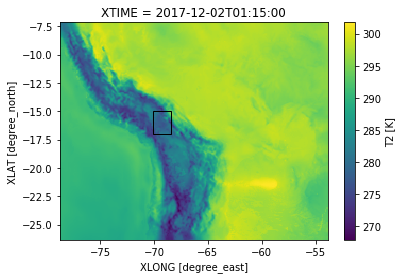

In [344]:
fig,ax = plt.subplots()
xd['T2'].isel(Time=1).plot(
    x='XLONG',y='XLAT',
    ax=ax)
rect = matplotlib.patches.Rectangle(
    (
        ll_dic['lom'],
        ll_dic['lam'],
    ),
    ll_dic['loM']-ll_dic['lom'],
    ll_dic['laM']-ll_dic['lam'],
    facecolor='none', edgecolor='k'
)
ax.add_patch(rect)

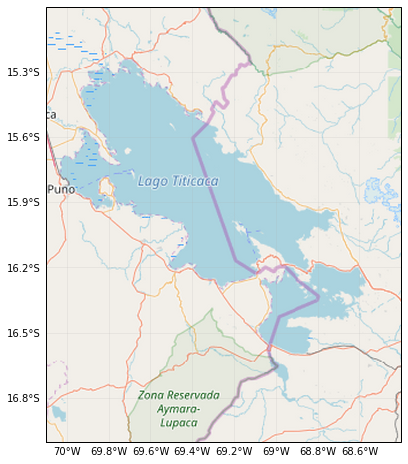

In [304]:
extent = [lom, loM, lam, laM]
zzoom = 8
request = cimgt.OSM()

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_extent(extent)

ax.add_image(request, zzoom, interpolation='spline36')

plt.show()

In [329]:
par = ['T2','LAKEMASK','TSK','LANDMASK']
patchs = {}
for d,r in fdf2[:].iterrows():
#     print(d[0])
    xd = xr.open_dataset(r.p)[par]
    xd = xd.isel({
        'west_east':  slice(wesn_dic['wem'],wesn_dic['weM']),
        'south_north':slice(wesn_dic['snm'],wesn_dic['snM']),
    })
    patchs[d]=xd.swap_dims({'Time':'XTIME'})

In [330]:
dl = list(patchs.values())
xc = xr.concat(dl[:],dim='XTIME')

In [331]:
ddf = xc.to_dataframe().reset_index()

/Volumes/mbProD/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


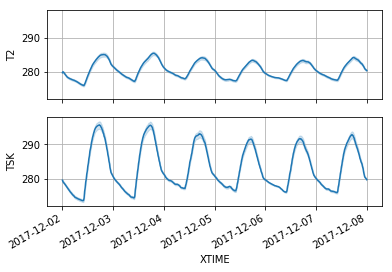

In [345]:
ddf = xc.to_dataframe().reset_index()
ppar = ['T2','TSK']
fig,axs = plt.subplots(2,1,sharey=True,sharex=True)
axf = np.ndarray.flatten(axs)
for p,ax in zip(ppar,axf ):
#     fig,ax = plt.subplots()
    ax = sns.lineplot(x='XTIME', y = p, data = ddf,ax=ax)
    ax.figure.autofmt_xdate()
    ax.grid()

/Volumes/mbProD/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


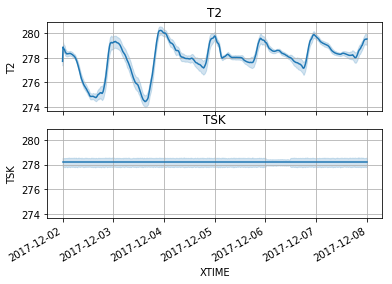

In [346]:
xc1 = xc.where(xc.LAKEMASK>.08)
ddf = xc1.to_dataframe().reset_index()
ppar = ['T2','TSK']
fig,axs = plt.subplots(2,1,sharey=True,sharex=True)
axf = np.ndarray.flatten(axs)
for p,ax in zip(ppar,axf ):
#     fig,ax = plt.subplots()
    ax = sns.lineplot(x='XTIME', y = p, data = ddf,ax=ax)
    ax.figure.autofmt_xdate()
    ax.set_title(p)
    ax.grid()

/Volumes/mbProD/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


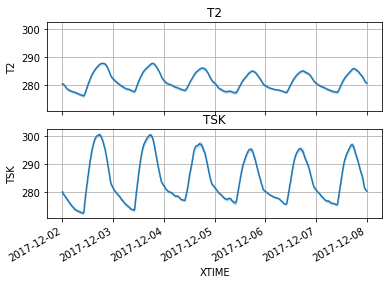

In [338]:
xc1 = xc.where(xc.LAKEMASK==0)
ddf = xc1.to_dataframe().reset_index()
ppar = ['T2','TSK']
fig,axs = plt.subplots(2,1,sharey=True,sharex=True)
axf = np.ndarray.flatten(axs)
for p,ax in zip(ppar,axf ):
#     fig,ax = plt.subplots()
    ax = sns.lineplot(x='XTIME', y = p, data = ddf,ax=ax)
    ax.figure.autofmt_xdate()
    ax.set_title(p)
    ax.grid()

/Volumes/mbProD/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


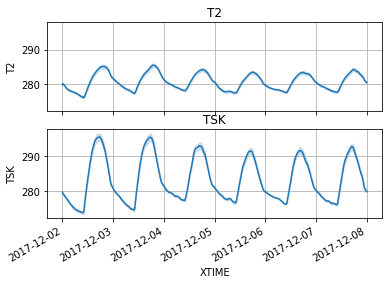

In [347]:
xc1 = xc.where(xc.LAKEMASK>=0)
ddf = xc1.to_dataframe().reset_index()
ppar = ['T2','TSK']
fig,axs = plt.subplots(2,1,sharey=True,sharex=True)
axf = np.ndarray.flatten(axs)
for p,ax in zip(ppar,axf ):
#     fig,ax = plt.subplots()
    ax = sns.lineplot(x='XTIME', y = p, data = ddf,ax=ax)
    ax.figure.autofmt_xdate()
    ax.set_title(p)
    ax.grid()

In [349]:
xcA = xc.where(xc.LAKEMASK>=0)
xcL = xc.where(xc.LAKEMASK==1)
xcT = xc.where(xc.LAKEMASK==0)
ppar = ['T2','TSK']
for p in ppar:
    xx=xcA[p]-xcL[p]

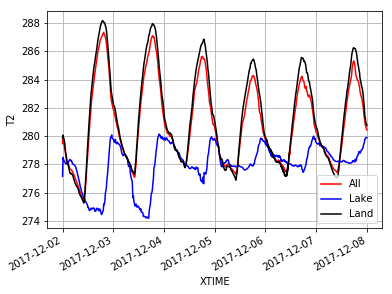

In [372]:
p='T2'
xcA[p].median(['south_north','west_east']).plot(color='red',label='All')
xcL[p].median(['south_north','west_east']).plot(color='blue',label='Lake')
xcT[p].median(['south_north','west_east']).plot(color='black',label='Land')
plt.gca().grid()
f = plt.gcf()
plt.gca().legend()

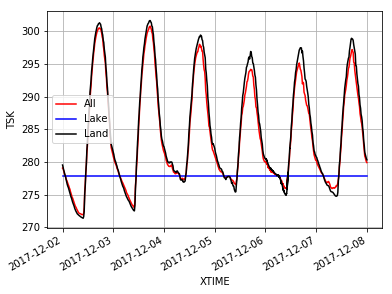

In [373]:
p='TSK'
xcA[p].median(['south_north','west_east']).plot(color='red',label='All')
xcL[p].median(['south_north','west_east']).plot(color='blue',label='Lake')
xcT[p].median(['south_north','west_east']).plot(color='black',label='Land')
plt.gca().grid()
f = plt.gcf()
plt.gca().legend()

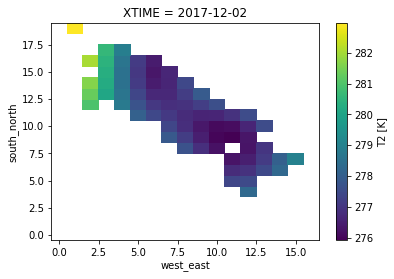

In [334]:
xc1['T2'][0].plot()

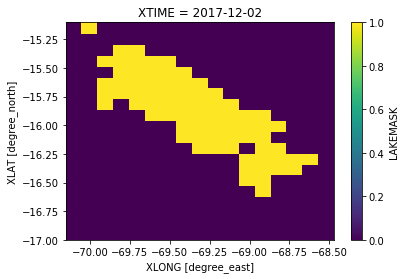

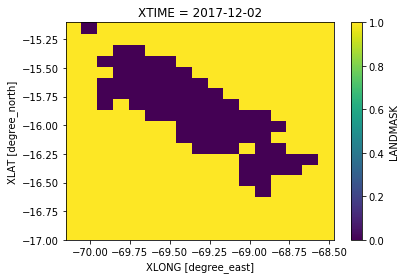

In [335]:
for p in ['LAKEMASK','LANDMASK']:
    plt.subplots()
    xc[p][0].plot(x='XLONG',y='XLAT')